In [1]:
import pandas as pd
import numpy as np

In [2]:
index_names = ['User'+str(x) for x in range(5)]
movie_names = ['Star Trek','Interstellar','Inception','Silver Linings Playbook','The Perks of Being a Wallflower']
times = ['Morning','Afternoon','Evening','Night']

In [3]:
time2id = {v:k for k,v in enumerate(times)}
id2time = {k:v for k,v in enumerate(times)}

In [4]:
index2id = {v:k for k,v in enumerate(index_names)}
id2index = {k:v for k,v in enumerate(index_names)}

In [5]:
movie2id = {v:k for k,v in enumerate(movie_names)}
id2movie = {k:v for k,v in enumerate(movie_names)}

In [6]:
id2time

{0: 'Morning', 1: 'Afternoon', 2: 'Evening', 3: 'Night'}

In [7]:
movie2id

{'Inception': 2,
 'Interstellar': 1,
 'Silver Linings Playbook': 3,
 'Star Trek': 0,
 'The Perks of Being a Wallflower': 4}

In [8]:
index2id

{'User0': 0, 'User1': 1, 'User2': 2, 'User3': 3, 'User4': 4}

In [9]:
dataset = pd.DataFrame(index=index_names,columns=movie_names)
dataset = dataset.fillna(0)

In [10]:
dataset.loc['User1']['Star Trek'] = 5
dataset.loc['User1']['Inception'] = 3
dataset.loc['User2']['Interstellar'] = 3
dataset.loc['User2']['Inception'] = 4
dataset.loc['User3']['Interstellar'] = 3
dataset.loc['User3']['Inception'] = 4
dataset.loc['User3']['Star Trek'] = 5
dataset.loc['User0']['Silver Linings Playbook'] = 5
dataset.loc['User0']['The Perks of Being a Wallflower'] = 3
dataset.loc['User0']['Star Trek'] = 3
dataset.loc['User4']['Silver Linings Playbook'] = 4
dataset.loc['User4']['The Perks of Being a Wallflower'] = 5

In [11]:
dataset

,Star Trek,Interstellar,Inception,Silver Linings Playbook,The Perks of Being a Wallflower
User0,3,0,0,5,3
User1,5,0,3,0,0
User2,0,3,4,0,0
User3,5,3,4,0,0
User4,0,0,0,4,5


In [12]:
flattened_dataset = dataset.unstack().reset_index()

In [13]:
columns = ['Movie','User','Rating']

In [14]:
flattened_dataset.columns = columns

In [15]:
time2id

{'Afternoon': 1, 'Evening': 2, 'Morning': 0, 'Night': 3}

In [16]:
np.random.seed(42)

In [17]:
def data_sampler(movie_name):
    if movie_name == 'Star Trek' or movie_name == 'Interstellar' or movie_name == 'Inception':
        return np.random.choice(['Morning','Afternoon'])
    else:
        return np.random.choice(['Evening','Night'])

In [18]:
flattened_dataset['Preferred_Time'] = flattened_dataset['Movie'].apply(lambda x: data_sampler(x))

In [19]:
flattened_dataset.to_csv('generated_dataset.csv')

In [20]:
flattened_dataset.head()

,Movie,User,Rating,Preferred_Time
0,Star Trek,User0,3,Morning
1,Star Trek,User1,5,Afternoon
2,Star Trek,User2,0,Morning
3,Star Trek,User3,5,Morning
4,Star Trek,User4,0,Morning


In [21]:
flattened_dataset['Movie'] = flattened_dataset['Movie'].apply(lambda x: movie2id[x])

In [22]:
flattened_dataset['User'] = flattened_dataset['User'].apply(lambda x: index2id[x])

In [23]:
flattened_dataset['Preferred_Time'] = flattened_dataset['Preferred_Time'].apply(lambda x: time2id[x])

In [24]:
flattened_dataset = flattened_dataset[['Movie','User','Preferred_Time','Rating']]

In [25]:
main_tensor = np.zeros((5,5,4))
for row in flattened_dataset.values:
    main_tensor[row[0],row[1],row[2]] = row[3]

In [127]:
from sktensor import dtensor, cp_als

In [128]:
T = dtensor(main_tensor)

In [129]:
P, fit, itr, exectimes = cp_als(T, 2, init='random')

In [130]:
M = np.array(P.U[0])

In [131]:
U = np.array(P.U[1])

In [132]:
T = np.array(P.U[2])

In [133]:
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)
#pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
pylab.rcParams['lines.linewidth'] = 2
pylab.rcParams['axes.facecolor'] = 'white'
pylab.rcParams['font.size'] = 16
pylab.rcParams['patch.edgecolor'] = 'white'
#rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib


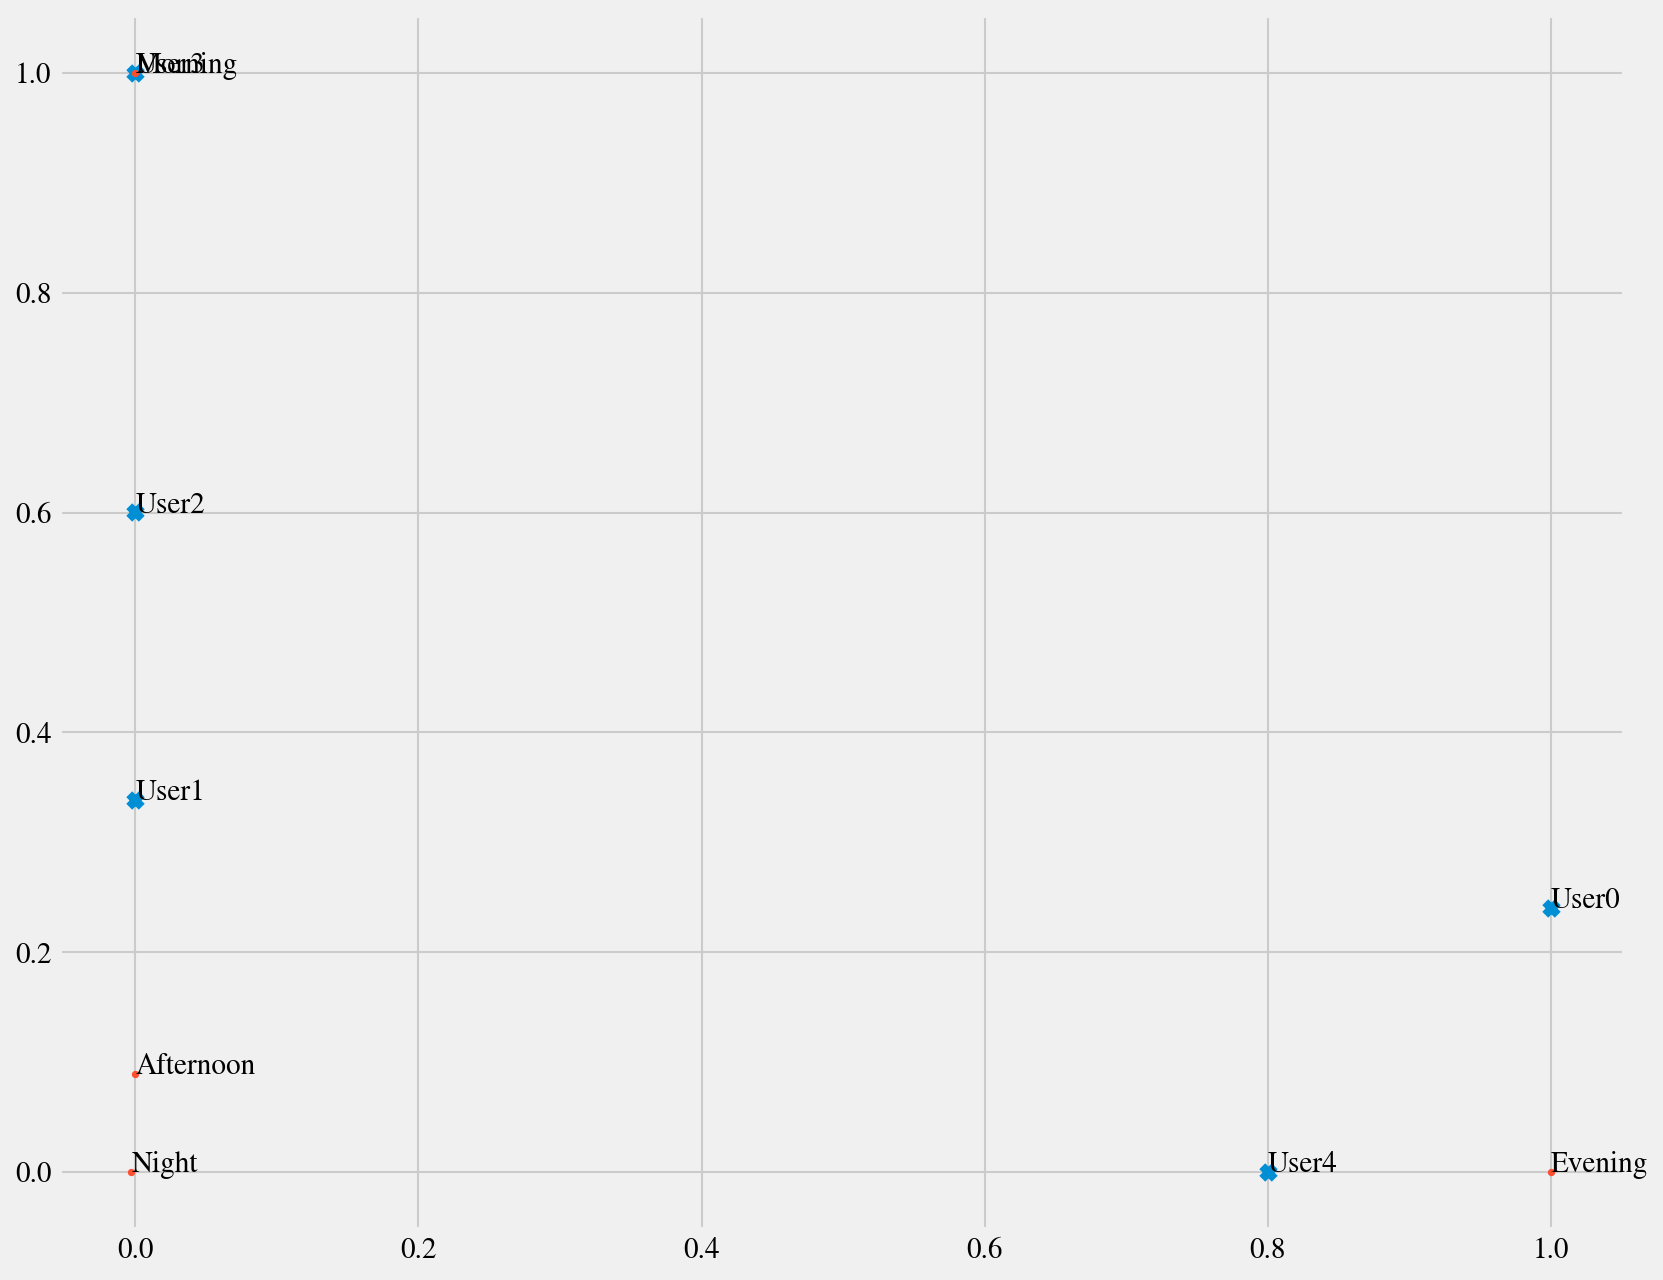

In [134]:
fig, ax = plt.subplots()
# ax.scatter(M[:,0],M[:,1],marker="h")

# for i, txt in enumerate(movie_names):
#     ax.annotate(txt, (M[i,0],M[i,1]))
    
ax.scatter(U[:,0],U[:,1],marker="x")

for i, txt in enumerate(index_names):
    ax.annotate(txt, (U[i,0],U[i,1]))
    
ax.scatter(T[:,0],T[:,1],marker=".")

for i, txt in enumerate(times):
    ax.annotate(txt, (T[i,0],T[i,1]))

In [135]:
def user_to_pref_time(user_id):
    return [id2time[x] for x in np.argsort(U[user_id].dot(T.T))[::-1][0:1]]

In [136]:
for x in range(5):
    print 'Preferred time for User%d is %s' %(x, user_to_pref_time(x)[0])

Preferred time for User0 is Evening
Preferred time for User1 is Morning
Preferred time for User2 is Morning
Preferred time for User3 is Morning
Preferred time for User4 is Evening


In [137]:
def user_to_pref_movie(user_id):
    return [id2movie[x] for x in np.argsort(U[user_id].dot(M.T))[::-1][0:1]]

In [138]:
for x in range(5):
    print 'Preferred movie for User%d is %s' %(x, user_to_pref_movie(x)[0])

Preferred movie for User0 is Silver Linings Playbook
Preferred movie for User1 is Inception
Preferred movie for User2 is Inception
Preferred movie for User3 is Inception
Preferred movie for User4 is Silver Linings Playbook
